## Preliminaries

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Create dataframe

In [13]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


## Make plot

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x264267e14a8>,
 <a list of 5 Text xticklabel objects>)

Text(0,0.5,'Percentage')

Text(0.5,0,'')

(-0.5, 5.5)

(-10, 110)

[None, None, None, None, None, None, None, None, None, None]

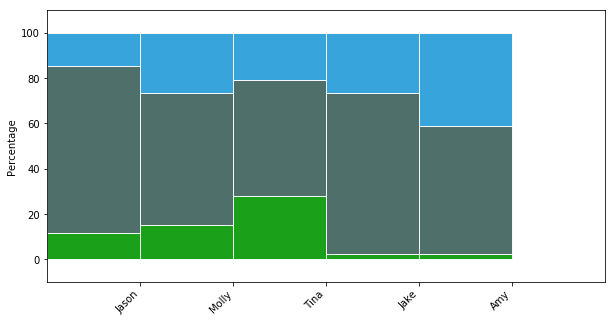

In [16]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['pre_score']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(df['mid_score'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(df['post_score'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Pre Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#019600',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Mid Score', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#3C5F5A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='Post Score',
       # with alpha
       alpha=0.9, 
       # with color
       color='#219AD8', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['first_name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

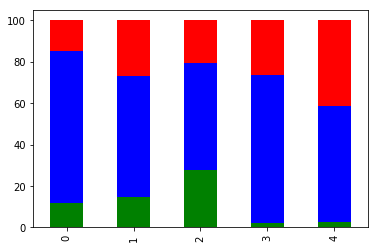

In [40]:
# Create the total score for each participant
df['totals']=df.pre_score+df.mid_score+df.post_score

# Create the percentage of the total score the pre_score value for each participant was
df['pre_rel'] = df.pre_score/df.totals*100

# Create the percentage of the total score the mid_score value for each participant was
df['mid_rel'] = df.mid_score/df.totals*100

# Create the percentage of the total score the post_score value for each participant was
df['post_rel'] = df.post_score/df.totals*100

df.pre_rel.plot.bar(color='g')
# plt.show()
df.mid_rel.plot.bar(bottom=df.pre_rel,color='b')
df.post_rel.plot.bar(bottom=df.pre_rel+df.mid_rel, color='r')